In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations
import numpy as np

from mflex.simulate.simulate_boundary import dipole

from mhsflex.field2d import Field2dData
from mhsflex.field3d import Field3dData, calculate_magfield
from mhsflex.vis import plot, plot_plasma_parameters
from mhsflex.metrics import compare_field3d

from matplotlib import rc, colors
import matplotlib.pyplot as plt

from mflex.model.field.utility.poloidal import (
    phi,
    phi_low,
    phi_hypgeo,
    dphidz_hypgeo,
    dphidz,
    dphidz_low,
)

rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)

c4 = (1.000, 0.224, 0.376)
c1 = (0.439, 0.788, 1.000)
c3 = "black"
c2 = (0.420, 0.502, 1.000)

cmap = colors.LinearSegmentedColormap.from_list(
    "cmap",
    (
        (0.000, (0.000, 0.000, 0.000)),
        (0.500, (0.659, 0.659, 0.659)),
        (1.000, (1.000, 1.000, 1.000)),
    ),
)

/Users/lilli/Library/Caches/pypoetry/virtualenvs/mflex-cNoQEf_u-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
nresol_x = 200
nresol_y = 200
nresol_z = 400
xmin = 0.0
xmax = 20.0  # in units of 10^4 km, therefore corresponds to 20Mm
ymin = 0.0
ymax = 20.0
zmin = 0.0
zmax = 20.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z

z0 = 2.0
deltaz = 0.2

nf_max = 200

z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
B_PHOTO = 500
data_bz = np.zeros((nresol_y, nresol_x))

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dipole(x, y)

In [ ]:
x_grid, y_grid = np.meshgrid(x_arr, y_arr)
folder = "/Users/lilli/Desktop/Thesis/Performance"
fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(
    x_grid,
    y_grid,
    data_bz,
    levels=np.array((-1.5, -1, -0.5, -0.2, -0.1, -0.05, 0, 0.05, 0.1, 0.2, 0.5, 1, 1.5)),
    colors="k",
    linewidths=0.5,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.clabel(CS, fontsize=8, inline=True)
ax.set_box_aspect(1)
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/contour.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [6]:
data2d = Field2dData(
    nresol_x,
    nresol_y,
    nresol_z,
    nresol_x,
    pixelsize_x,
    pixelsize_y,
    pixelsize_z,
    x_arr,
    y_arr,
    z_arr,
    data_bz,
)

In [15]:
a = 0.0
alpha = 0.05
b = 1.0

folder = "/Users/lilli/Desktop/Thesis/Performance/plots/LFF"
folder2 = "/Users/lilli/Desktop/Thesis/Performance/plots_2F1/LFF"

In [16]:
data3d = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

data3dNW = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

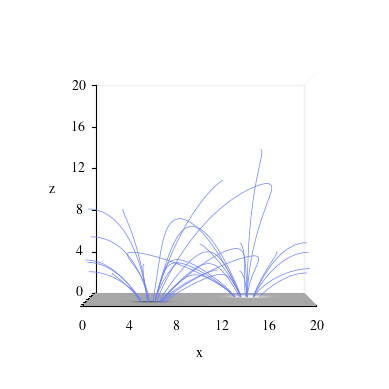

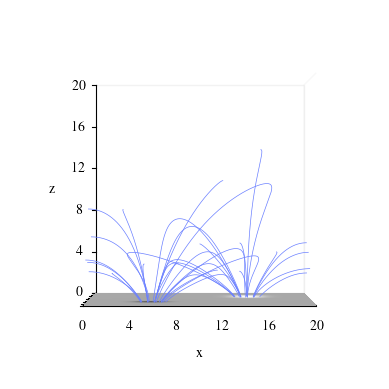

In [17]:
plot(data3d, 'side', save=True, path=folder)

plot(data3dNW, 'side', save=True, path=folder2)

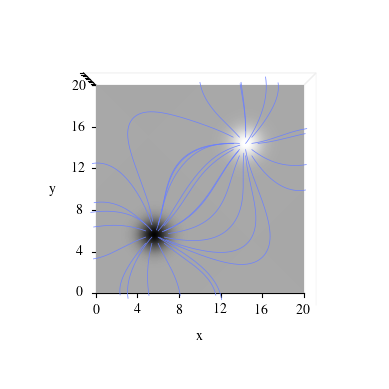

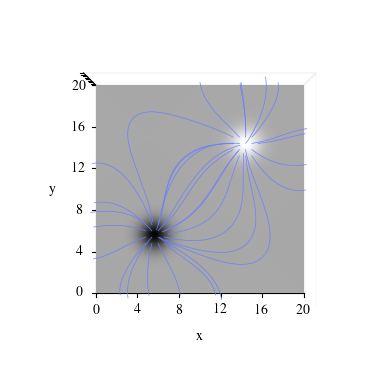

In [18]:
plot(data3d, 'los', save=True, path=folder)

plot(data3dNW, 'los', save=True, path=folder2)

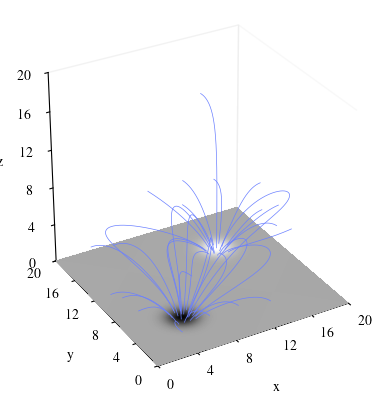

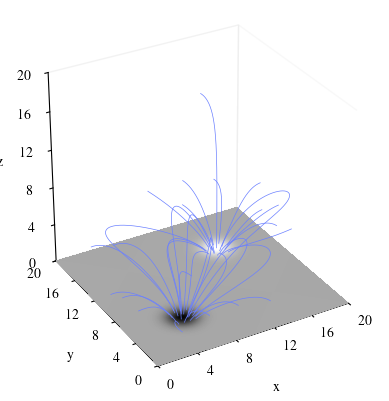

In [19]:
plot(data3d, 'angular', save=True, path=folder)

plot(data3dNW, 'angular', save=True, path=folder2)

In [7]:
a = 0.0
alpha = 0.0
b = 1.0

data3d = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

data3dNW = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

compare_field3d(data3dNW, data3d)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9999999999999999 (Reference value:  1.0 )
Cauchy-Schwarz metric:  1.0 (Reference value:  1.0 )
Normalised vector error metric:  3.198331912055172e-16 (Reference value:  0.0 )
Mean vector error metric:  1.6141482430237732e-15 (Reference value:  0.0 )
Magnetic energy metric:  0.9999999999999997 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------


/Users/lilli/Desktop/mflex/mhsflex/metrics.py:272: RuntimeWarning: invalid value encountered in scalar divide
  temp = num / div


Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  0.9931350114416476
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CORRELATION COEFFICIENT METRICS
-----------------------------------------------------------------------------------------------------------
Pearson Correlation reference value for pressure  PearsonRResult(statistic=nan, pvalue=nan)
Pearson Correlation reference value for density  PearsonRResult(statistic=nan, pvalue=nan)
Pearson Correlation actual value for pressure  PearsonRResult(statistic=nan, pvalue=nan)
Pearson Correlation actual value for density  PearsonRResult(statistic=nan, pvalue=nan)


/Users/lilli/Desktop/mflex/mhsflex/metrics.py:320: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(pres_surface_ref.flatten(), pres_surface_ref.flatten()),
/Users/lilli/Desktop/mflex/mhsflex/metrics.py:324: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(den_surface_ref.flatten(), den_surface_ref.flatten()),
/Users/lilli/Desktop/mflex/mhsflex/metrics.py:328: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(pres_surface_rec.flatten(), pres_surface_ref.flatten()),
/Users/lilli/Desktop/mflex/mhsflex/metrics.py:332: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(den_surface_rec.flatten(), den_surface_ref.flatten()),


In [8]:
a = 0.0
alpha = 0.05
b = 1.0

data3d = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

data3dNW = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

compare_field3d(data3dNW, data3d)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  1.0000000000000002 (Reference value:  1.0 )
Cauchy-Schwarz metric:  1.0 (Reference value:  1.0 )
Normalised vector error metric:  3.056444138218875e-16 (Reference value:  0.0 )
Mean vector error metric:  1.6168965152065371e-15 (Reference value:  0.0 )
Magnetic energy metric:  1.0000000000000002 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  0.9931350114416476
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CORRELATION COEFFICIENT METRI

In [9]:
a = 0.22
alpha = 0.05
b = 1.0

data3d = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

data3dNW = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

compare_field3d(data3dNW, data3d)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9999986309597769 (Reference value:  1.0 )
Cauchy-Schwarz metric:  0.9999999370129736 (Reference value:  1.0 )
Normalised vector error metric:  0.0008072802663300802 (Reference value:  0.0 )
Mean vector error metric:  0.0002970083359114777 (Reference value:  0.0 )
Magnetic energy metric:  1.000182956970201 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  0.993140243902439
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CORRELATION COEFF

In [10]:
a = 0.44
alpha = 0.05
b = 1.0

data3d = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

data3dNW = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

compare_field3d(data3dNW, data3d)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9999864578823343 (Reference value:  1.0 )
Cauchy-Schwarz metric:  0.9999996579174381 (Reference value:  1.0 )
Normalised vector error metric:  0.0022740944902554855 (Reference value:  0.0 )
Mean vector error metric:  0.0006126601944479571 (Reference value:  0.0 )
Magnetic energy metric:  1.001824102220342 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  0.9931297709923664
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CORRELATION COEF

In [ ]:
a = 0.0
alpha = 0.0
b = 1.0

data3dp = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

data3dNWp = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

In [ ]:
a = 0.0
alpha = 0.05
b = 1.0

data3dlff = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

data3dNWlff = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

In [ ]:
a = 0.22
alpha = 0.05
b = 1.0

data3dmhs1 = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

data3dNWmhs1 = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

In [ ]:
a = 0.44
alpha = 0.05
b = 1.0

data3dmhs2 = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

data3dNWmhs2 = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

In [ ]:
folder = "/Users/lilli/Desktop/Thesis/Performance"

In [ ]:
ix_max = np.unravel_index(data3dlff.bz.argmax(), data3dlff.bz.shape)[1]
iy_max = np.unravel_index(data3dlff.bz.argmax(), data3dlff.bz.shape)[0]

plt.plot(
    data3dlff.z,
    data3dlff.dpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c3,
    label="LFF",
)
plt.plot(
    data3dmhs1.z,
    data3dmhs1.dpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c2,
    label="MHS A",
)
plt.plot(
    data3dNWmhs1.z,
    data3dNWmhs1.dpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color=c2,
    label="MHS A N+W(2019)",
)
plt.plot(
    data3dmhs2.z,
    data3dmhs2.dpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c4,
    label="MHS B",
)
plt.plot(
    data3dNWmhs2.z,
    data3dNWmhs2.dpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color=c4,
    label="MHS B N+W(2019)",
)
plt.ylabel(r"$\Delta p$")
plt.xlabel("z")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/dpres.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

plt.plot(
    data3dlff.z,
    data3dlff.ddensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c3,
    label="LFF",
)
plt.plot(
    data3dmhs1.z,
    data3dmhs1.ddensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c2,
    label="MHS A",
)
plt.plot(
    data3dNWmhs1.z,
    data3dNWmhs1.ddensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color=c2,
    label="MHS A N+W(2019)",
)
plt.plot(
    data3dmhs2.z,
    data3dmhs2.ddensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c4,
    label="MHS B",
)
plt.plot(
    data3dNWmhs2.z,
    data3dNWmhs2.ddensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color=c4,
    label="MHS B N+W(2019)",
)
plt.ylabel(r"$\Delta \rho$")
plt.xlabel("z")
plt.legend(frameon=False)
plt.xlim([0, 2 * z0])
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/dden.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()